## **WS small world network implement**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def wire_ws(n, k, beta, seed=None):
    if k % 2 != 0:
        raise ValueError("k needs to be even")
    if seed is not None:
        random.seed(seed)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(-k // 2, k // 2 + 1):
            if j == 0:
                continue
            new_edge = (i + j + n) % n
            if random.random() < beta:
                new_edge = random.randint(0, n - 2)
                if new_edge >= i:
                    new_edge += 1
            G.add_edge(i, new_edge)
    return G


In [2]:
import os
import matplotlib.pyplot as plt
import networkx as nx

output_dir = "wa_graphs"
os.makedirs(output_dir, exist_ok=True)

k = 4
beta = 0.1
seed = 42

for n in range(1, 21):
    if n <= k:
        print(f"pass n={n}（need to larger than k, k={k}）")
        continue

    G = wire_ws(n=n, k=k, beta=beta, seed=seed)

    plt.figure(figsize=(6, 6))
    nx.draw_circular(G, with_labels=True, node_color='skyblue',
                     edge_color='gray', node_size=500, font_size=10)

    title = f"G = wire_ws(n={n}, k={k}, beta={beta}, seed={seed})"
    plt.title(title, fontsize=12)

    # 儲存圖
    filename = os.path.join(output_dir, f"ws_n{n}.jpg")
    plt.savefig(filename, format="jpg", dpi=300)
    plt.close()
    print(f"is saved：{filename}")

pass n=1（need to larger than k, k=4）
pass n=2（need to larger than k, k=4）
pass n=3（need to larger than k, k=4）
pass n=4（need to larger than k, k=4）
is saved：wa_graphs/ws_n5.jpg
is saved：wa_graphs/ws_n6.jpg
is saved：wa_graphs/ws_n7.jpg
is saved：wa_graphs/ws_n8.jpg
is saved：wa_graphs/ws_n9.jpg
is saved：wa_graphs/ws_n10.jpg
is saved：wa_graphs/ws_n11.jpg
is saved：wa_graphs/ws_n12.jpg
is saved：wa_graphs/ws_n13.jpg
is saved：wa_graphs/ws_n14.jpg
is saved：wa_graphs/ws_n15.jpg
is saved：wa_graphs/ws_n16.jpg
is saved：wa_graphs/ws_n17.jpg
is saved：wa_graphs/ws_n18.jpg
is saved：wa_graphs/ws_n19.jpg
is saved：wa_graphs/ws_n20.jpg


## **BA scale-free network implement**

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def wire_scale_free_ba(n, k, seed=None):
    if seed is not None:
        random.seed(seed)

    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    if n <= k:
        return G

    # edge i has ends (ends[2*i], ends[2*i+1])
    ends = [0] * (2 * k * (n - k))

    for i in range(k):
        G.add_edge(k, i)
        ends[2 * i] = k
        ends[2 * i + 1] = i

    length = 2 * k

    for i in range(k + 1, n):
        for j in range(k):
            while True:
                target = ends[random.randint(0, length - 1)]
                for m in range(j):
                    if ends[length + 2 * m + 1] == target:
                        break
                else:
                    break
            G.add_edge(i, target)
            ends[length + 2 * j] = i
            ends[length + 2 * j + 1] = target
        length += 2 * k

    return G

In [4]:
import os
import matplotlib.pyplot as plt
import networkx as nx

output_dir = "ba_graphs"
os.makedirs(output_dir, exist_ok=True)

k = 2
seed = 42

for n in range(1, 21):
    if n <= k:
        print(f"pass n={n}（need to larger than k={k}）")
        continue

    G = wire_scale_free_ba(n=n, k=k, seed=seed)

    plt.figure(figsize=(6, 6))
    nx.draw_spring(G, with_labels=True, node_color='lightgreen',
                   edge_color='gray', node_size=500, font_size=10)

    title = f"Barabási–Albert Scale-Free Network\nG = wire_scale_free_ba(n={n}, k={k}, seed={seed})"
    plt.title(title, fontsize=14)

    filename = os.path.join(output_dir, f"ba_n{n}.jpg")
    plt.savefig(filename, format="jpg", dpi=300)
    plt.close()
    print(f"is saved：{filename}")

pass n=1（need to larger than k=2）
pass n=2（need to larger than k=2）
is saved：ba_graphs/ba_n3.jpg
is saved：ba_graphs/ba_n4.jpg
is saved：ba_graphs/ba_n5.jpg
is saved：ba_graphs/ba_n6.jpg
is saved：ba_graphs/ba_n7.jpg
is saved：ba_graphs/ba_n8.jpg
is saved：ba_graphs/ba_n9.jpg
is saved：ba_graphs/ba_n10.jpg
is saved：ba_graphs/ba_n11.jpg
is saved：ba_graphs/ba_n12.jpg
is saved：ba_graphs/ba_n13.jpg
is saved：ba_graphs/ba_n14.jpg
is saved：ba_graphs/ba_n15.jpg
is saved：ba_graphs/ba_n16.jpg
is saved：ba_graphs/ba_n17.jpg
is saved：ba_graphs/ba_n18.jpg
is saved：ba_graphs/ba_n19.jpg
is saved：ba_graphs/ba_n20.jpg


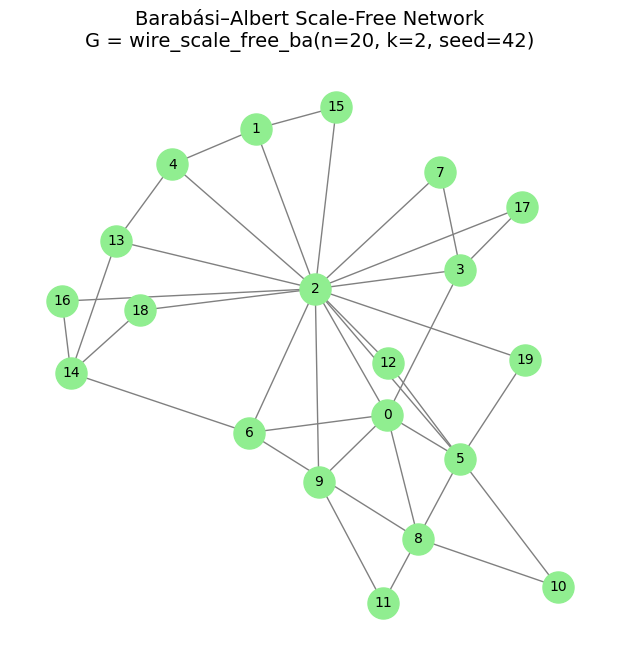

In [5]:
n = 20
k = 2
seed = 42

G = wire_scale_free_ba(n=n, k=k, seed=seed)

plt.figure(figsize=(6, 6))
nx.draw_spring(G, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500, font_size=10)

plt.title(f"Barabási–Albert Scale-Free Network\nG = wire_scale_free_ba(n={n}, k={k}, seed={seed})", fontsize=14)
plt.show()

In [6]:
from PIL import Image
import os

folder = "ba_graphs"  # or wa_graphs
image_files = [f"ba_n{n}.jpg" for n in range(3, 21)] 

images = [Image.open(os.path.join(folder, fname)) for fname in image_files]

img_width, img_height = images[0].size

cols = 4
rows = -(-len(images) // cols) 

combined_img = Image.new("RGB", (cols * img_width, rows * img_height), color="white")

for index, img in enumerate(images):
    x = (index % cols) * img_width
    y = (index // cols) * img_height
    combined_img.paste(img, (x, y))

combined_img.save("ba_combined.jpg")
print("is saved：ba_combined.jpg")

is saved：ba_combined.jpg


In [7]:
from PIL import Image
import os

folder = "wa_graphs"  # or wa_graphs
image_files = [f"ws_n{n}.jpg" for n in range(5, 21)]

images = [Image.open(os.path.join(folder, fname)) for fname in image_files]

img_width, img_height = images[0].size

cols = 4
rows = -(-len(images) // cols)

combined_img = Image.new("RGB", (cols * img_width, rows * img_height), color="white")

for index, img in enumerate(images):
    x = (index % cols) * img_width
    y = (index // cols) * img_height
    combined_img.paste(img, (x, y))

combined_img.save("ws_combined.jpg")
print("is saved：ws_combined.jpg")


is saved：ws_combined.jpg
